In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf 
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
Airline=pd.read_csv("Airlines.csv")
Airline

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [3]:
Airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

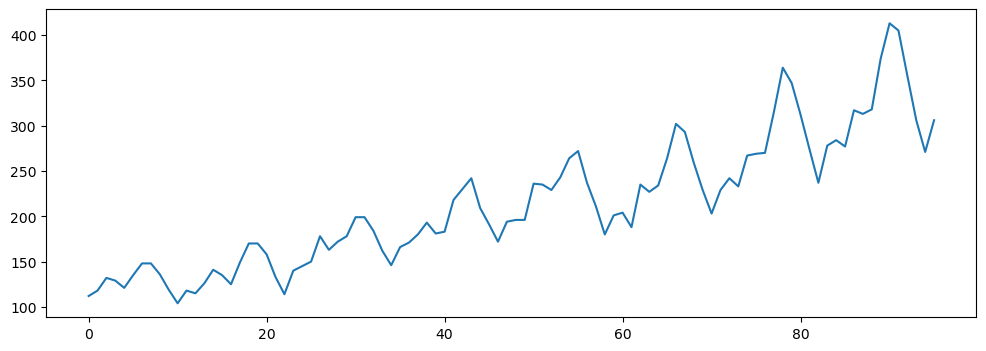

In [4]:
Airline.Passengers.plot(figsize=(12,4));

In [5]:
print('Shape of the data', Airline.shape)

Shape of the data (96, 2)


In [6]:
Airline.dtypes

Month         object
Passengers     int64
dtype: object

In [7]:
Airline.nunique()

Month         96
Passengers    80
dtype: int64

In [8]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
Airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
#Feature Engineering - Renaming the Month column into Date
Airline.rename({'Month':'Date'}, axis=1, inplace=True)

In [12]:
pip install pandas==1.3.5

Note: you may need to restart the kernel to use updated packages.Collecting pandas==1.3.5
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     - -------------------------------------- 0.2/4.7 MB 11.5 MB/s eta 0:00:01
     -- ------------------------------------- 0.3/4.7 MB 4.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.4/4.7 MB 3.4 MB/s eta 0:00:02
     ---- ----------------------------------- 0.6/4.7 MB 3.3 MB/s eta 0:00:02
     ------ --------------------------------- 0.7/4.7 MB 3.0 MB/s eta 0:00:02
     ------- -------------------------------- 0.8/4.7 MB 2.8 MB/s eta 0:00:02
     ------- -------------------------------- 0.9/4.7 MB 2.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.0/4.7 MB 2.7 MB/s eta 0:00:02
     --------- ------------------------------ 1.1/4.7 MB 2.8 MB/s eta 0:00:02
     ---------- ----------------------------- 1.2/4.7 MB 2.7 MB/s eta 0:00:02
     ----------- ---------------------------- 1.4/4.7 MB 2

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2474 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-311\pandas
  creating build\lib.win-amd64-cpython-311\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-311\pandas\api
  creating build\lib.win-amd64-cpython-311\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-311\p

     -------------- ------------------------- 1.7/4.7 MB 2.9 MB/s eta 0:00:02
     --------------- ------------------------ 1.9/4.7 MB 2.9 MB/s eta 0:00:01
     ---------------- ----------------------- 2.0/4.7 MB 3.0 MB/s eta 0:00:01
     ----------------- ---------------------- 2.1/4.7 MB 2.9 MB/s eta 0:00:01
     ------------------ --------------------- 2.2/4.7 MB 2.9 MB/s eta 0:00:01
     ------------------- -------------------- 2.3/4.7 MB 2.9 MB/s eta 0:00:01
     -------------------- ------------------- 2.4/4.7 MB 2.8 MB/s eta 0:00:01
     --------------------- ------------------ 2.5/4.7 MB 2.8 MB/s eta 0:00:01
     ---------------------- ----------------- 2.7/4.7 MB 2.8 MB/s eta 0:00:01
     ----------------------- ---------------- 2.8/4.7 MB 2.8 MB/s eta 0:00:01
     ------------------------ --------------- 2.9/4.7 MB 2.8 MB/s eta 0:00:01
     ------------------------ --------------- 2.9/4.7 MB 2.7 MB/s eta 0:00:01
     ------------------------- -------------- 3.0/4.7 MB 2.7 MB/

          already explicitly excluding 'pandas.tests.io.data.legacy_pickle' via
          `find_namespace_packages(...)/find_namespace` or `find_packages(...)/find`,
          you can try to use `exclude_package_data`, or `include-package-data=False` in
          combination with a more fine grained `package-data` configuration.
  
          You can read more about "package data files" on setuptools documentation page:
  
          - https://setuptools.pypa.io/en/latest/userguide/datafiles.html
  
  
          [^1]: For Python, any directory (with suitable naming) can be imported,
                even if it does not contain any `.py` files.
                On the other hand, currently there is no concept of package data
                directory, all directories are treated like packages.
          ********************************************************************************
  
  !!
    check.warn(importable)
  C:\Users\user\AppData\Local\Temp\pip-build-env-nzyht5vs\overlay\Lib\site

In [24]:
Airline1 = Airline.copy()
Airline1.set_index('Date', inplace=True)
Airline1.index

Index(['Jan-95', 'Feb-95', 'Mar-95', 'Apr-95', 'May-95', 'Jun-95', 'Jul-95',
       'Aug-95', 'Sep-95', 'Oct-95', 'Nov-95', 'Dec-95', 'Jan-96', 'Feb-96',
       'Mar-96', 'Apr-96', 'May-96', 'Jun-96', 'Jul-96', 'Aug-96', 'Sep-96',
       'Oct-96', 'Nov-96', 'Dec-96', 'Jan-97', 'Feb-97', 'Mar-97', 'Apr-97',
       'May-97', 'Jun-97', 'Jul-97', 'Aug-97', 'Sep-97', 'Oct-97', 'Nov-97',
       'Dec-97', 'Jan-98', 'Feb-98', 'Mar-98', 'Apr-98', 'May-98', 'Jun-98',
       'Jul-98', 'Aug-98', 'Sep-98', 'Oct-98', 'Nov-98', 'Dec-98', 'Jan-99',
       'Feb-99', 'Mar-99', 'Apr-99', 'May-99', 'Jun-99', 'Jul-99', 'Aug-99',
       'Sep-99', 'Oct-99', 'Nov-99', 'Dec-99', 'Jan-00', 'Feb-00', 'Mar-00',
       'Apr-00', 'May-00', 'Jun-00', 'Jul-00', 'Aug-00', 'Sep-00', 'Oct-00',
       'Nov-00', 'Dec-00', 'Jan-01', 'Feb-01', 'Mar-01', 'Apr-01', 'May-01',
       'Jun-01', 'Jul-01', 'Aug-01', 'Sep-01', 'Oct-01', 'Nov-01', 'Dec-01',
       'Jan-02', 'Feb-02', 'Mar-02', 'Apr-02', 'May-02', 'Jun-02', 'Jul-02',

In [25]:
Airline1.head()

,Passengers
Date,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121


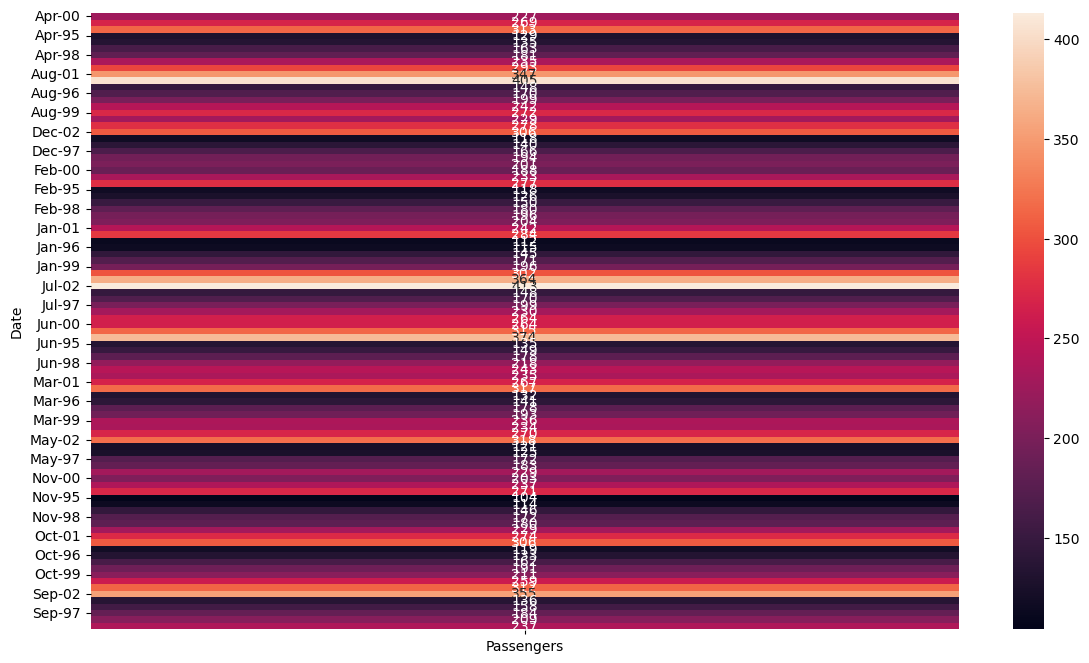

In [29]:
#Data Visualization
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=Airline1,values="Passengers",index="Date")#,columns="month")#,aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

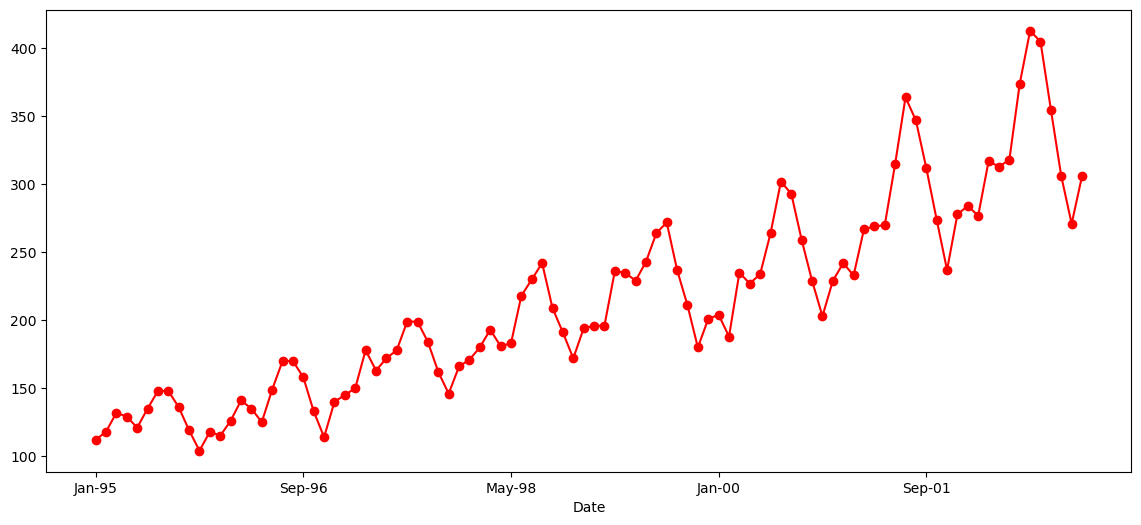

In [30]:
#Line plot
Airline1['Passengers'].plot(figsize=(14,6),color='red',marker='o')
plt.show()

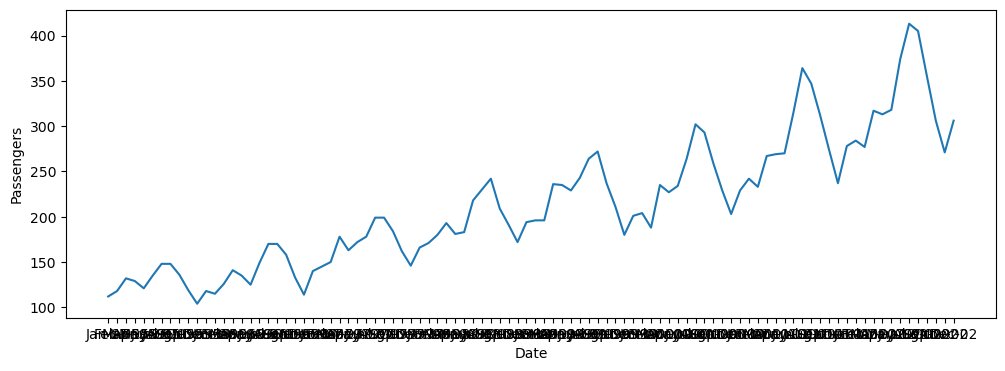

In [32]:
#Yearly Passenger Analysis
plt.figure(figsize=(12,4))
sns.lineplot(x="Date", y="Passengers", data=Airline1)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

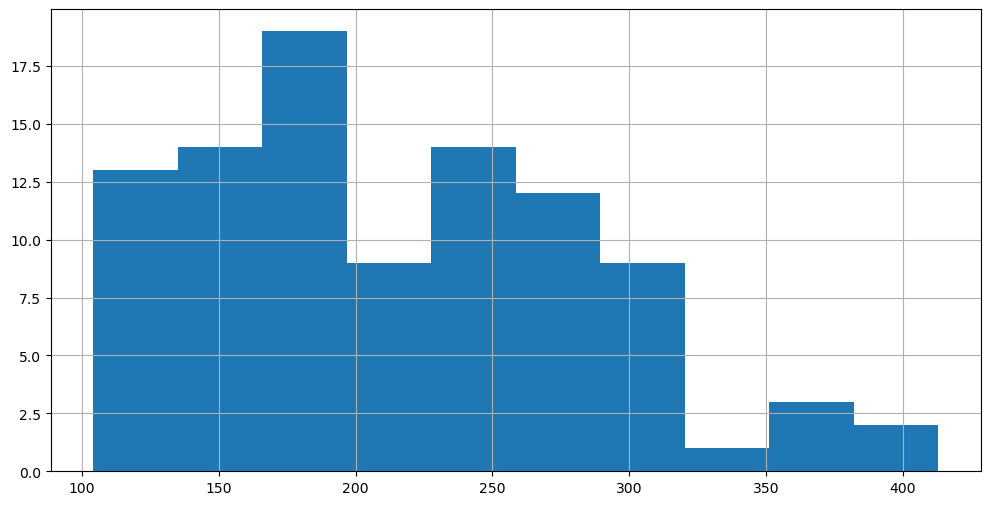

In [38]:
#histogram
Airline1.Passengers.hist(figsize=(12,6))
plt.show()

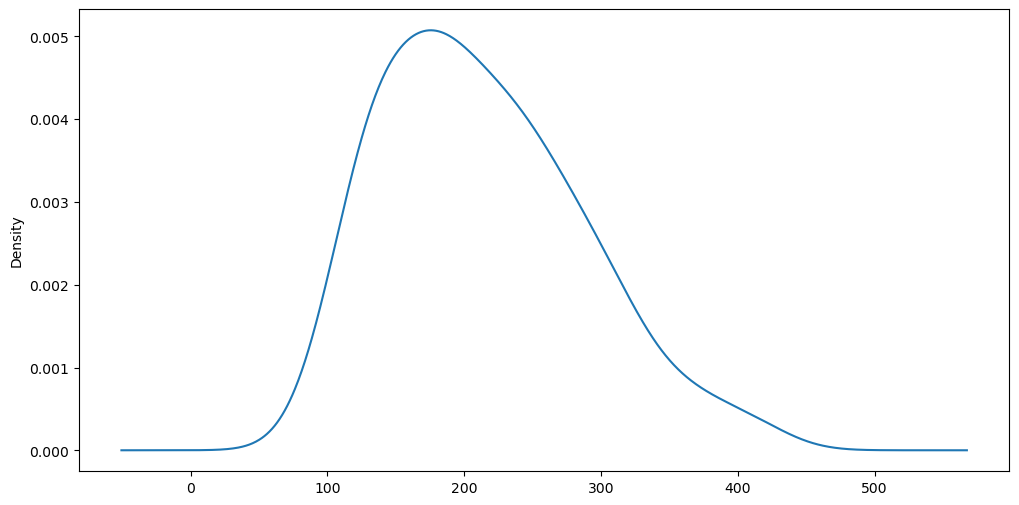

In [39]:
Airline1.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

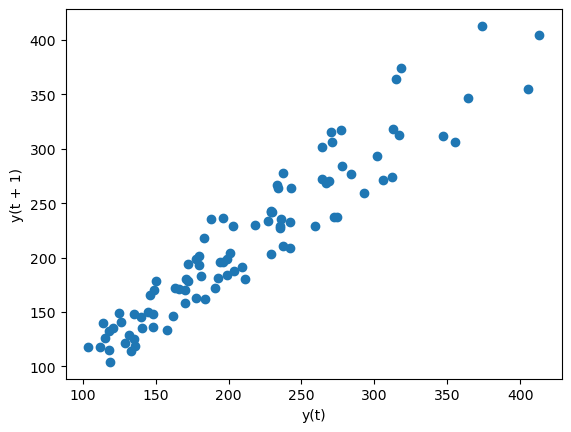

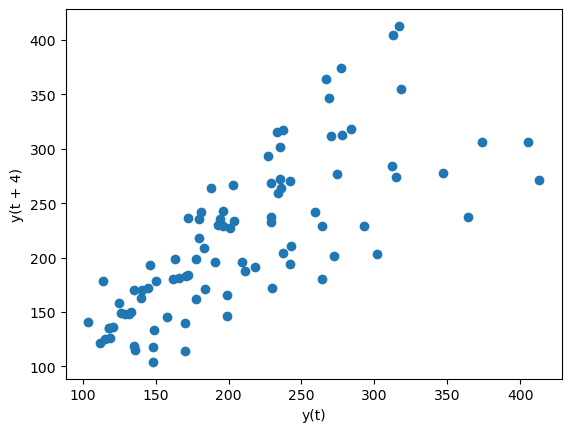

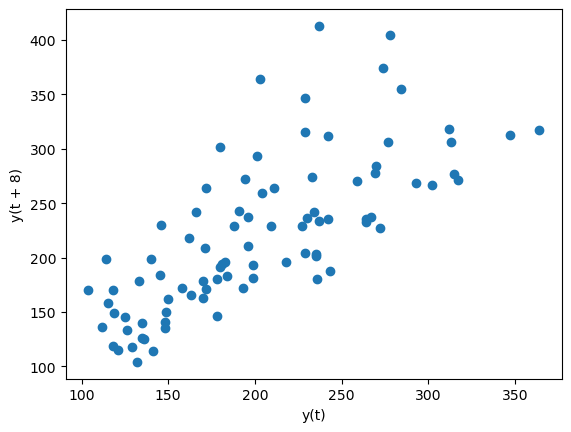

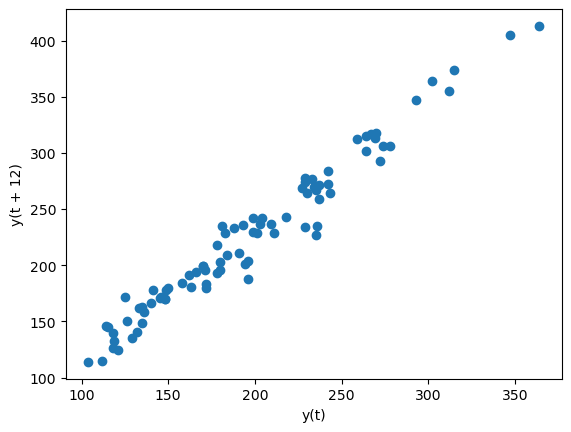

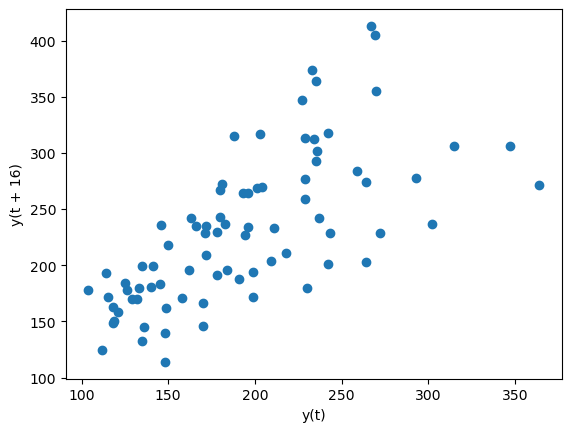

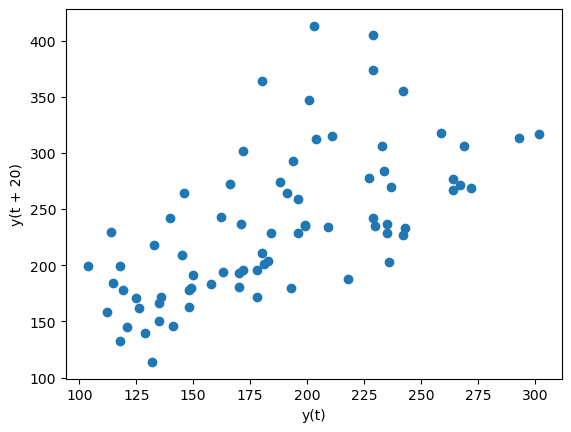

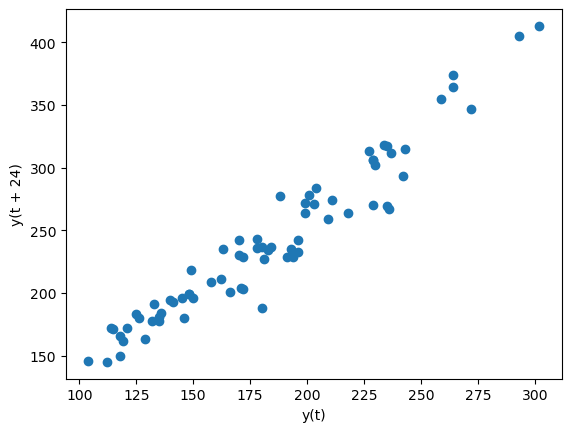

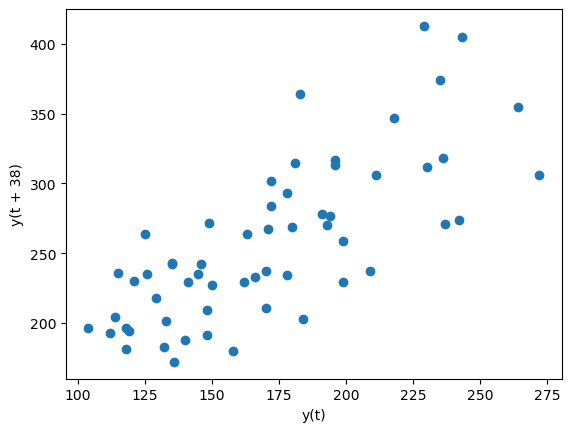

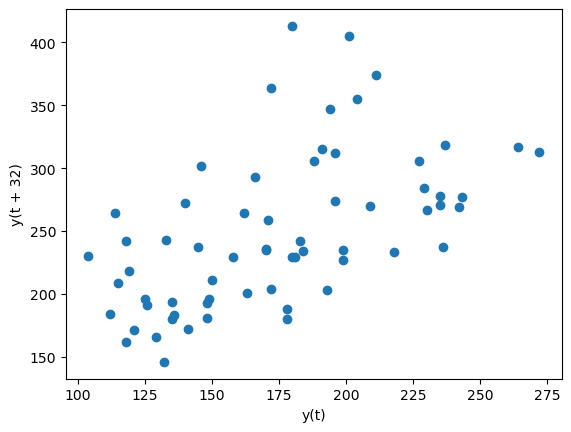

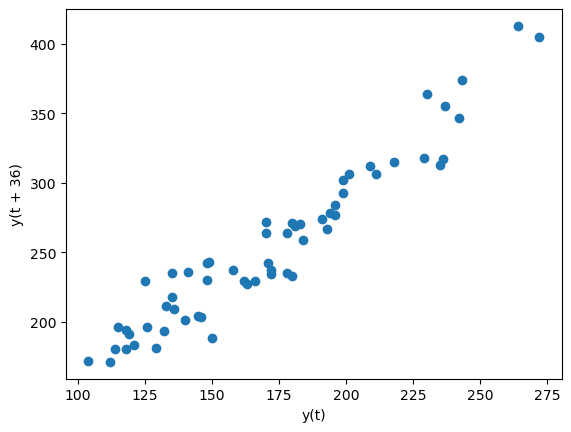

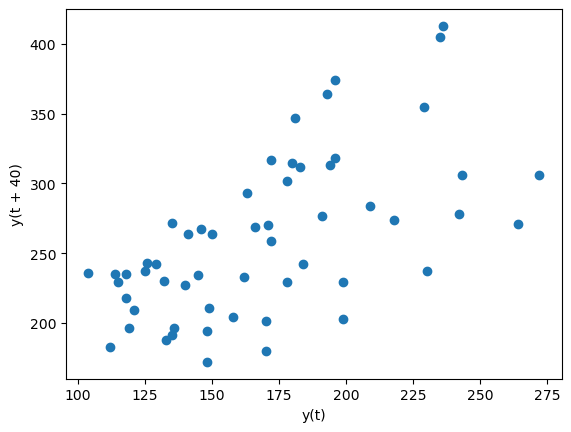

In [40]:
# create a scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(Airline1.Passengers, lag=i)
    plt.show()

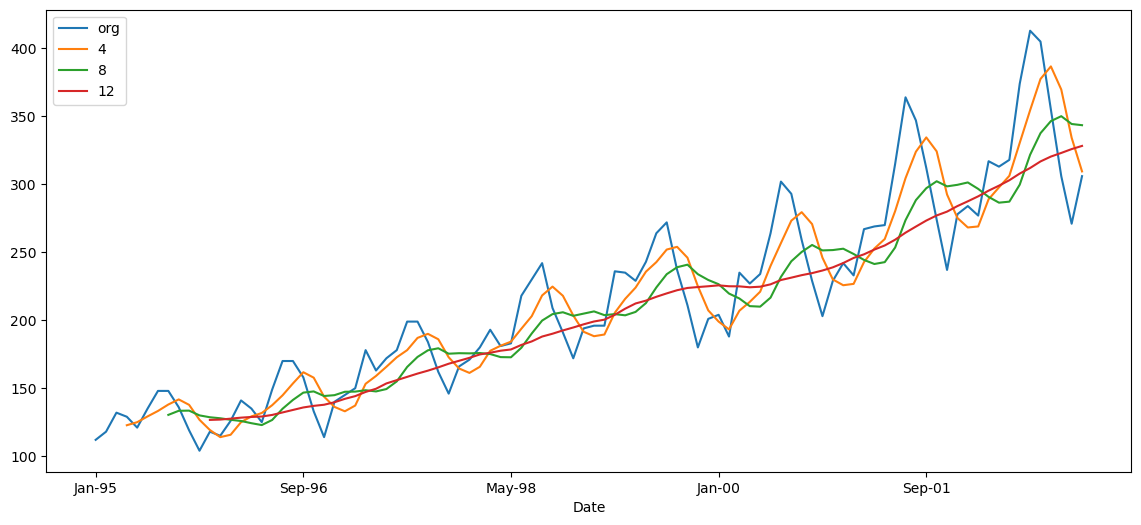

In [41]:
#Moving Average
plt.figure(figsize=(14,6))
Airline1.Passengers.plot(label="org")
for i in range(4,13,4):
    Airline1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

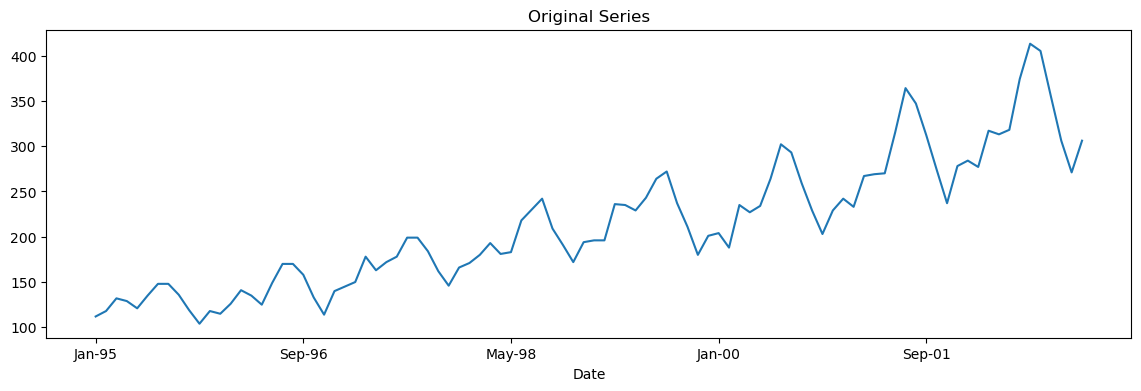

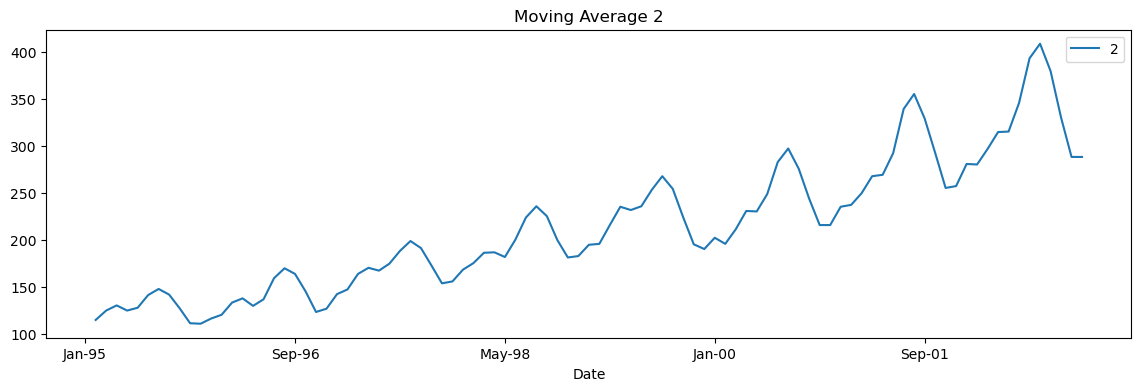

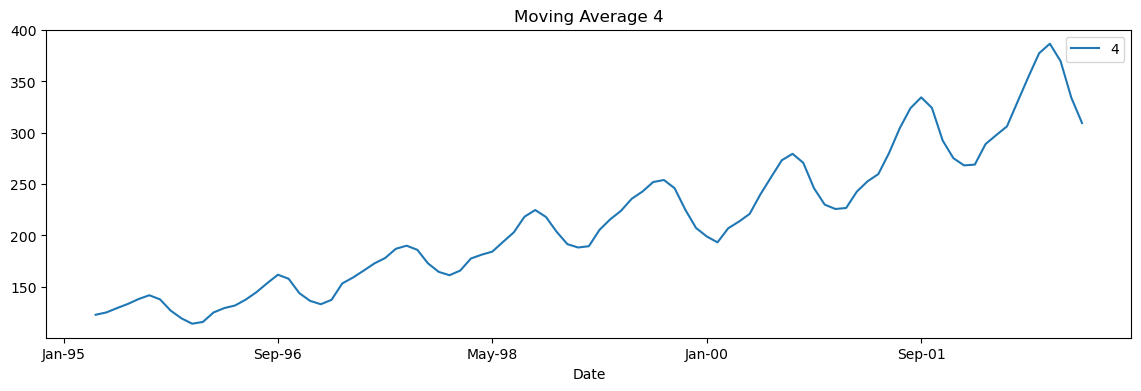

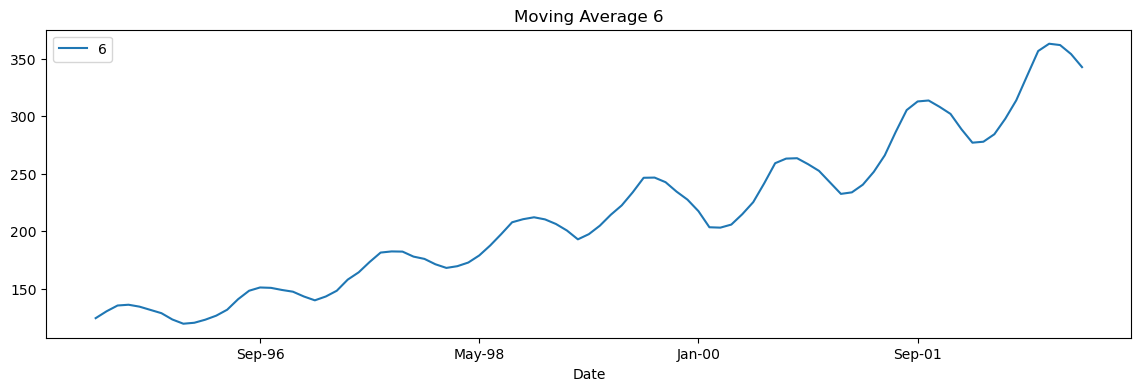

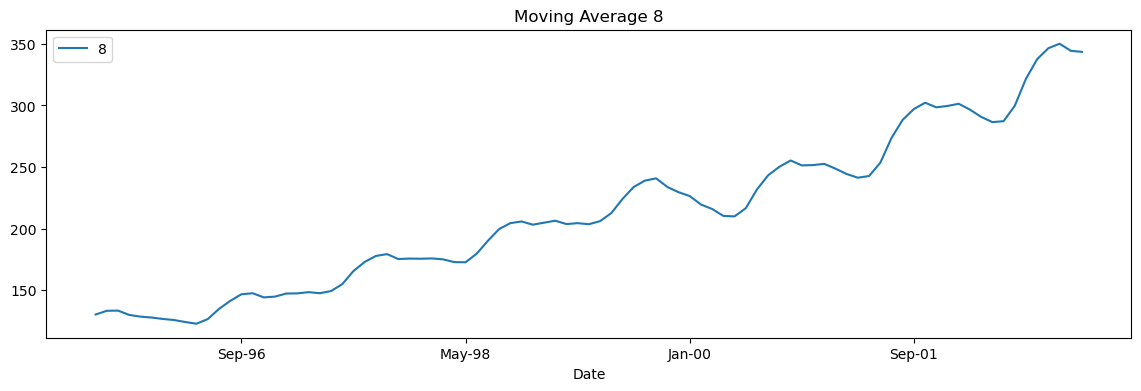

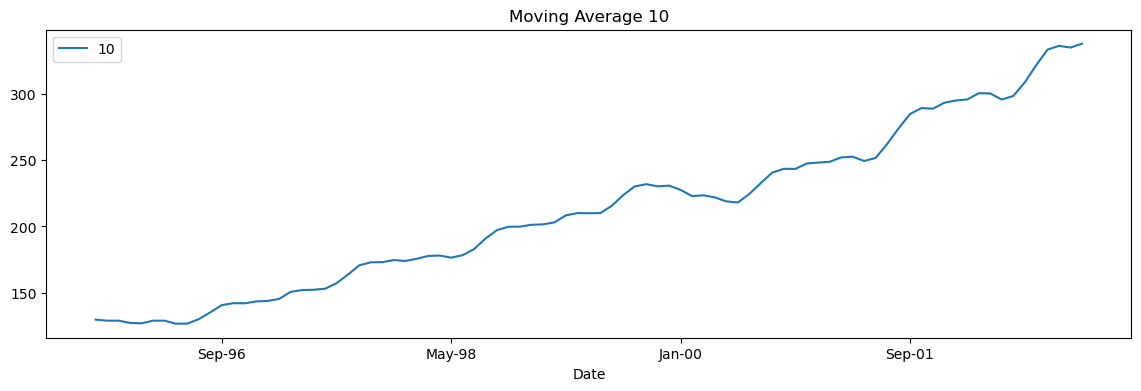

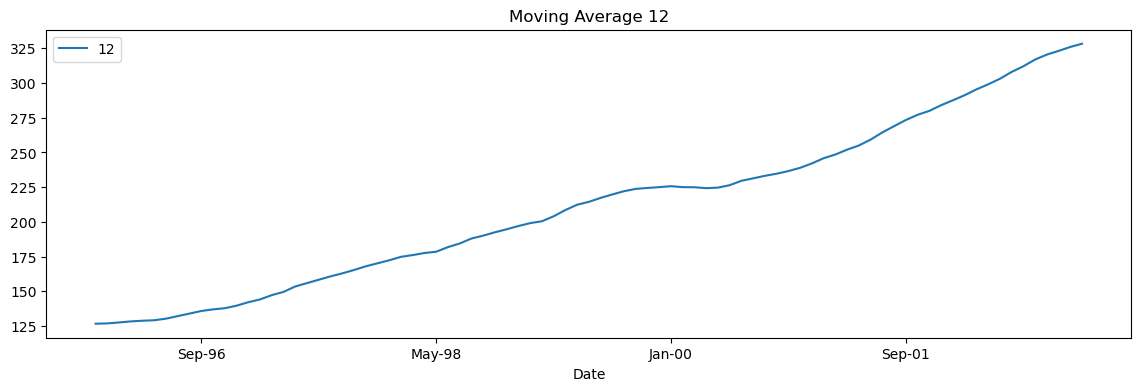

In [43]:
plt.figure(figsize=(14,4))
Airline1.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    Airline1["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

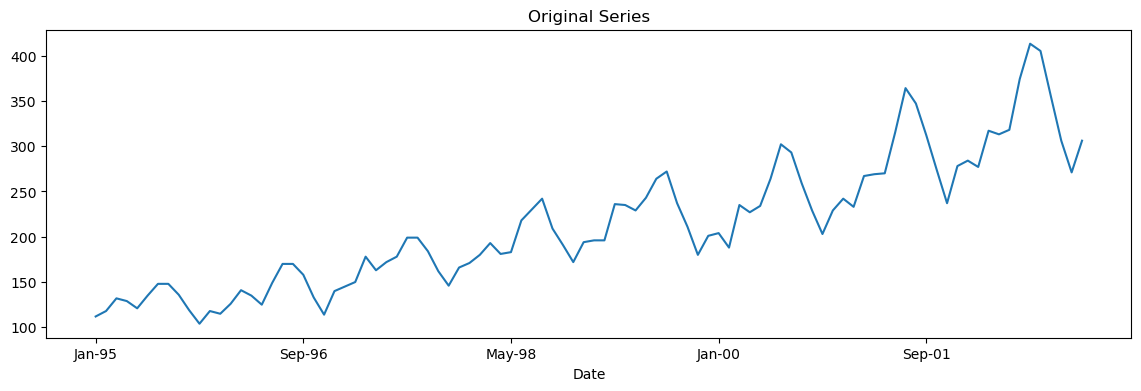

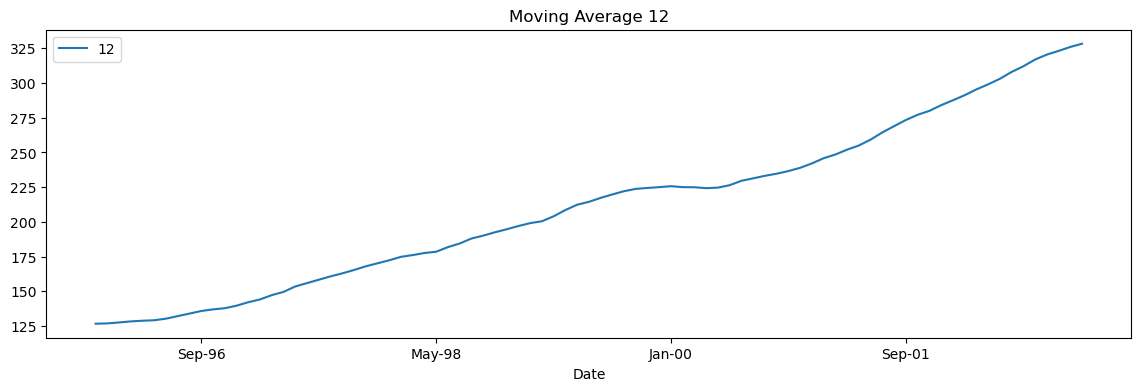

In [44]:
plt.figure(figsize=(14,4))
Airline1.Passengers.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
Airline1["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

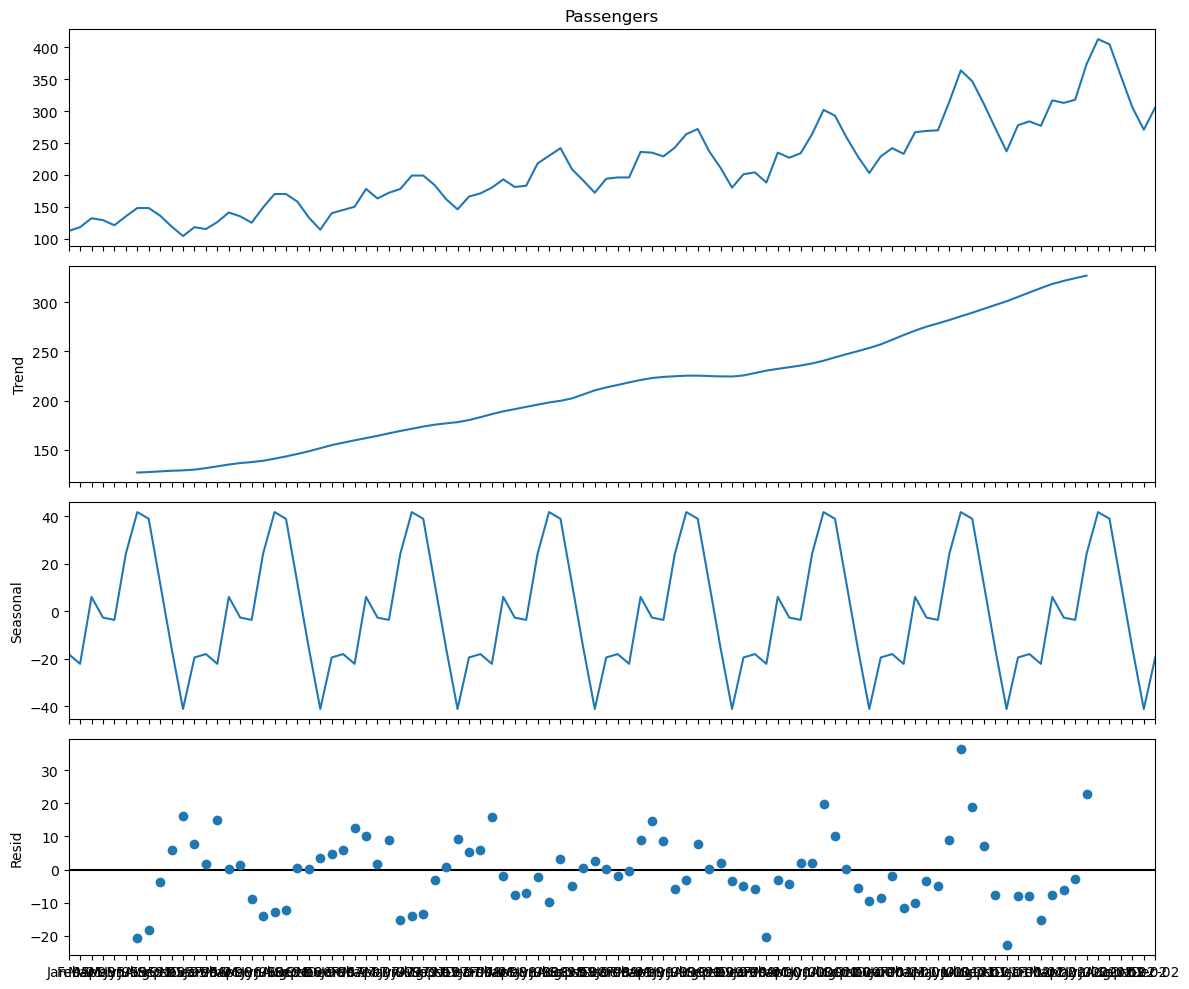

In [45]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(Airline1.Passengers, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

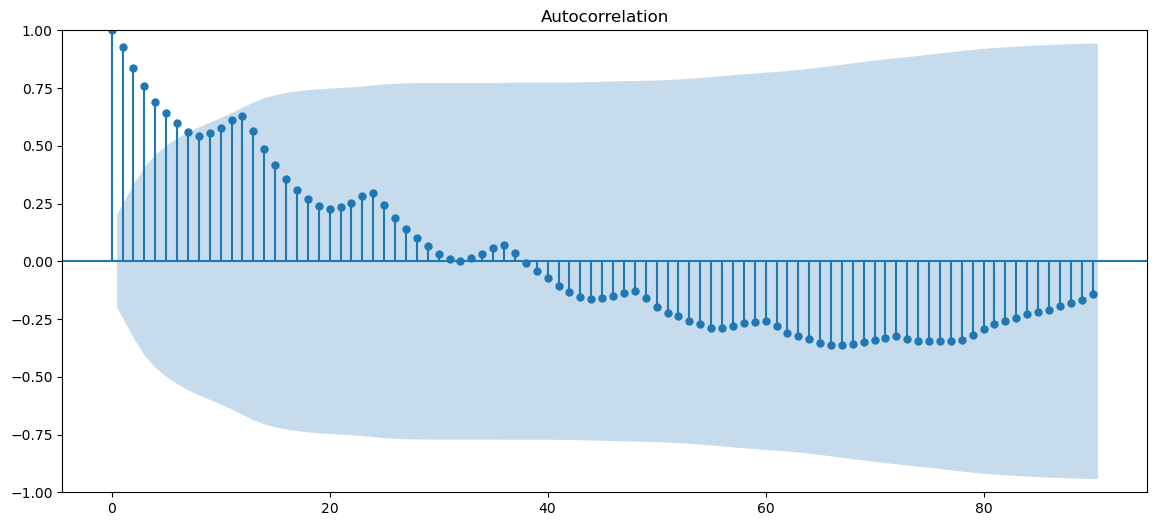

In [47]:
#ACF plots and PACF plots #3Autocorrelation Function (ACF)
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(Airline1.Passengers, lags=90)
    plt.show()

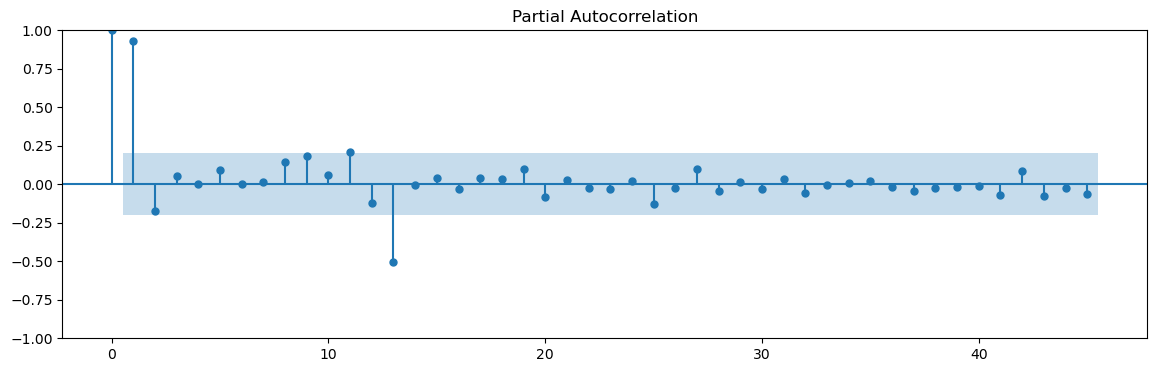

In [48]:
#Partial Autocorrelation Function (PACF)
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(Airline1.Passengers,lags=45)
    plt.show()

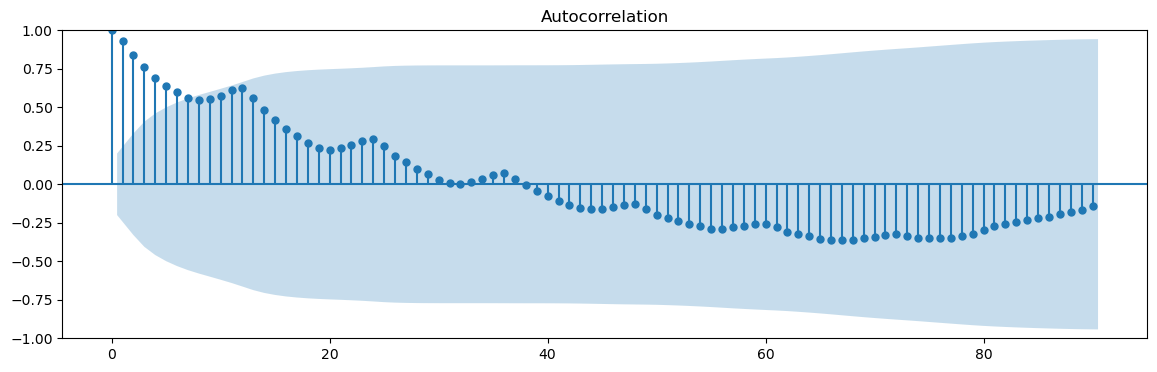

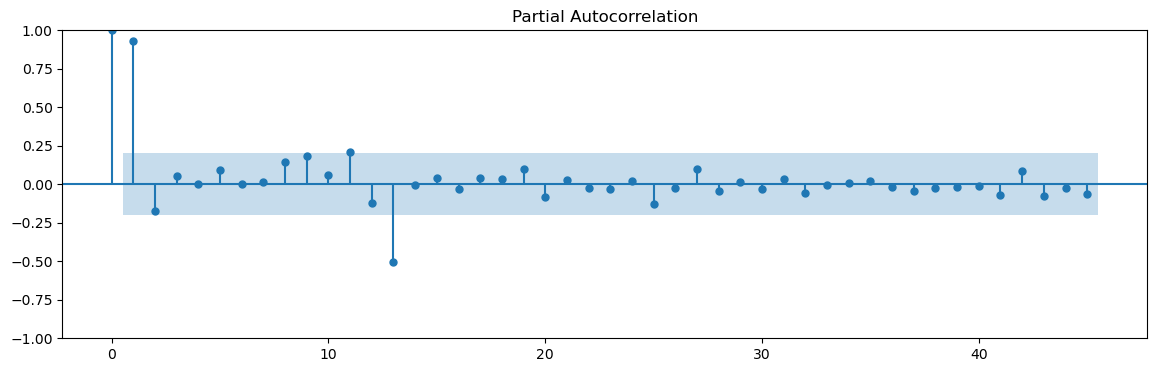

In [49]:
#A partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_acf(Airline1.Passengers,lags=90)
    tsa_plots.plot_pacf(Airline1.Passengers,lags=45)
    plt.show()

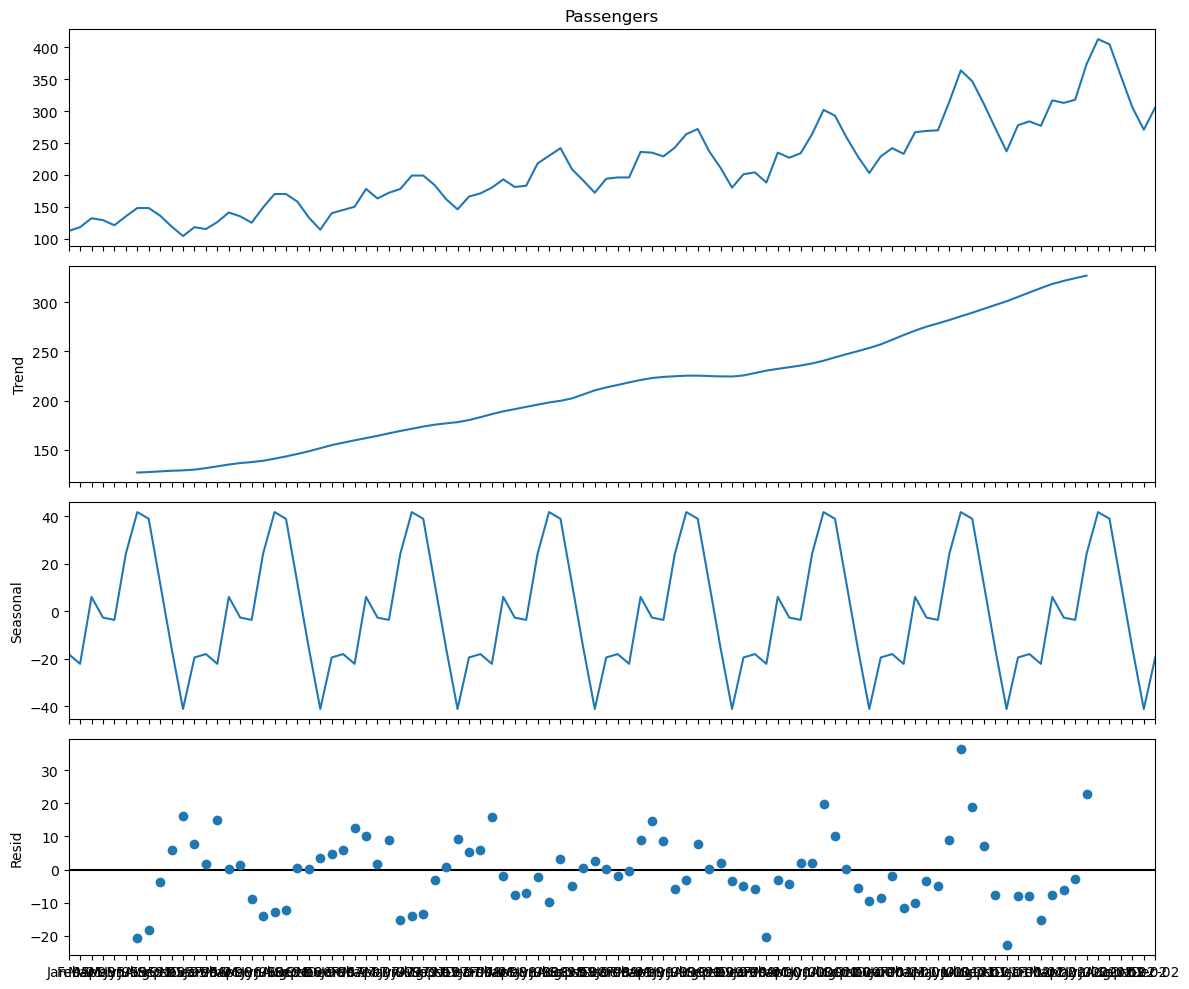

In [52]:
#Additive Seasonal Decomposition
decompose_ts_add = seasonal_decompose(Airline1.Passengers, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

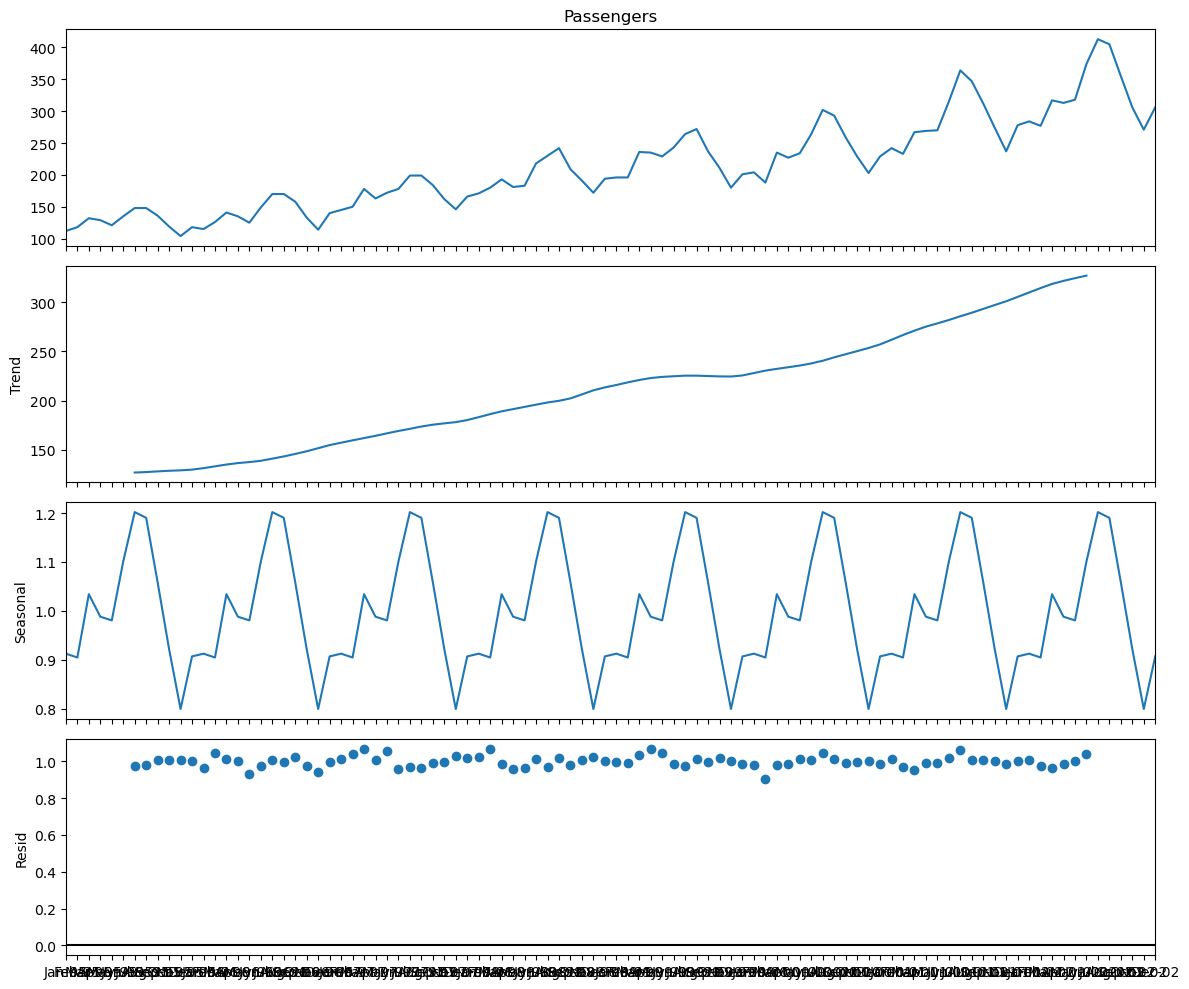

In [53]:
#Multiplicative Seasonal Decomposition
decompose_ts_add = seasonal_decompose(Airline1.Passengers,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

In [56]:
#Splitting Train and Test Data
#Leaving Test Data with 2 Years of Time Series
size = 72
train_data = Airline1[:size]
test_data = Airline1[size:]

In [57]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: Apr-00 Sep-99 
 Test: Apr-01 Sep-02


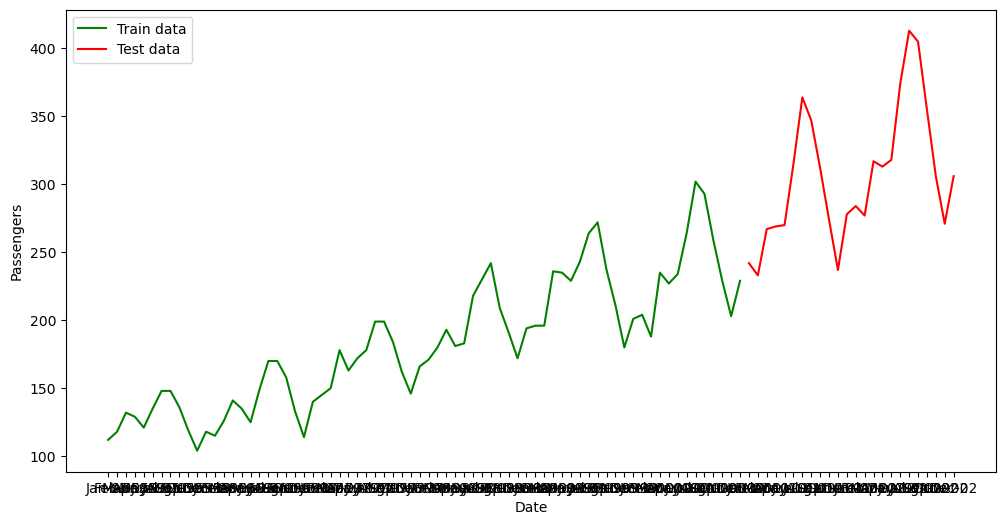

In [58]:
#Last 24 records contain From 2001 to 2002 data.
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

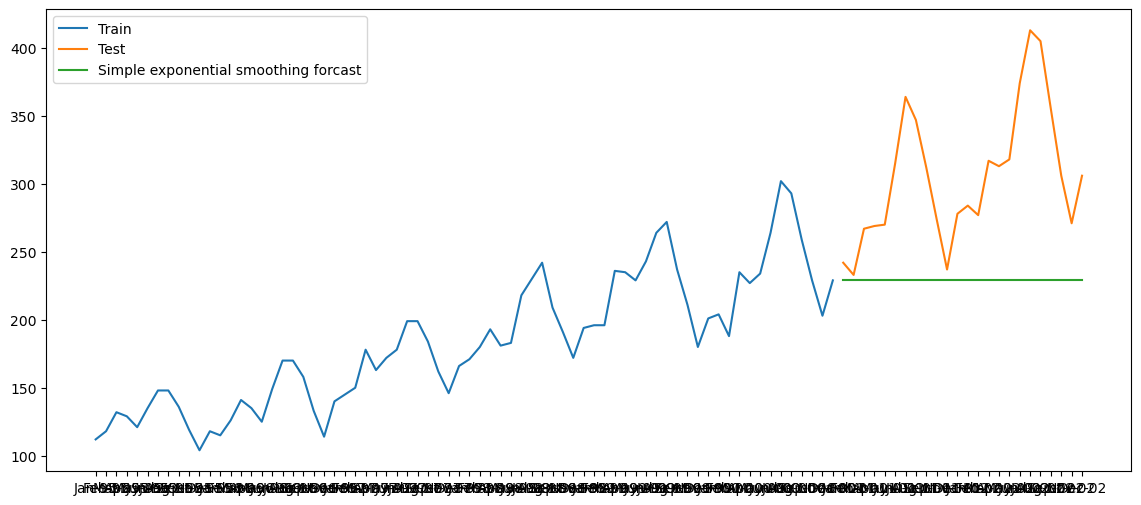

In [60]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()